## Matplotlib and Seaborn Part II

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Regression

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0,0.5,'Combined Fuel Eff. (mpg)')

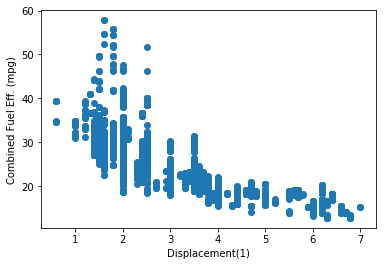

In [4]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

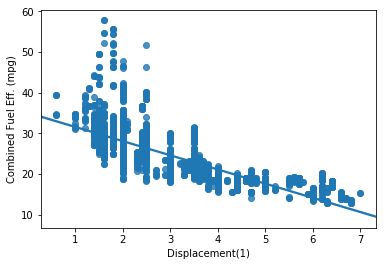

In [6]:
# use sns to add the regression line
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

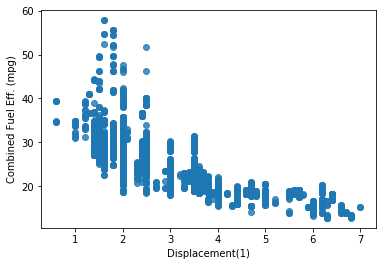

In [7]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', 
            fit_reg = False) # turn off the regression line
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

([<matplotlib.axis.YTick at 0x1a0d1679e8>,
 <a list of 6 Text yticklabel objects>)

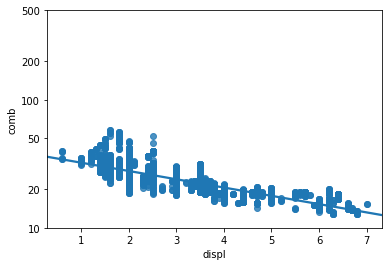

In [9]:
# log transformation of the data

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

### 2. Overplotting, transparency, and jitter

Overplotting: Where a plot is created with too many overplapping points. Resolve with: sampling / transparency/ jitter

1. sampling: use a random sample to plot a small number of points

2. transparency: add to a scatter call by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque)

3. jittering: add jitter to move the position of each point slightly from its true value (adds a small amount of random noise to the position of each point, so that multiple data points that have the same values are now spread over a small area). Jitter keeps each of the discrete values in distinct bands

    

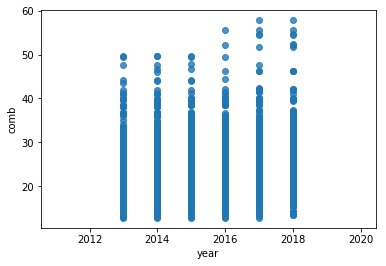

In [10]:
sns.regplot(data = fuel_econ, x='year', y='comb', fit_reg=False)

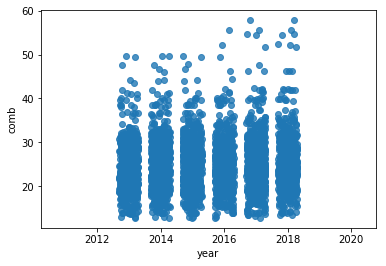

In [11]:
sns.regplot(data = fuel_econ, x='year', y='comb', x_jitter = 0.3, fit_reg=False)

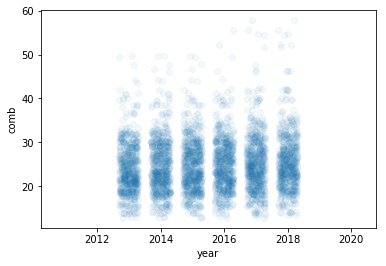

In [13]:
sns.regplot(data = fuel_econ, x='year', y='comb', 
            x_jitter = 0.3, scatter_kws = {'alpha' : 1/20},fit_reg=False)

### 3. Heatmap

- A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Heat map can be implemented with Matplotlib's hist2d function.
- Heat maps for quantitative variable vs. quantitative variable
- Good for discrete variable vs. discrete variable
- Good alternative to transparency for a lot of data
- Bin sizes are important

Text(0,0.5,'Combined Fuel Eff. (mpg)')

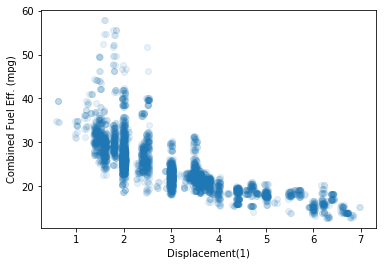

In [14]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', 
            x_jitter = 0.04, scatter_kws = {'alpha': 1/10},
            fit_reg = False)
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

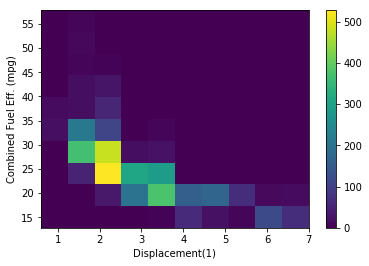

In [16]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0,0.5,'Combined Fuel Eff. (mpg)')

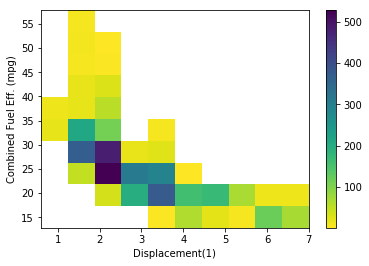

In [18]:
# set a minimum bound of counts before a rectangular area can be plotted
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r') # revise color
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [19]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


Text(0,0.5,'Combined Fuel Eff. (mpg)')

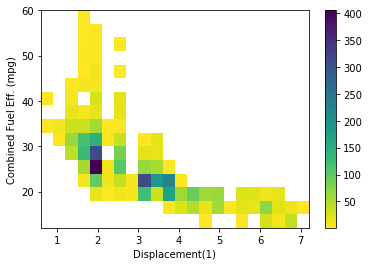

In [20]:
# based on the statistics above, reset the bin size
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]) 
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

### 4. Violin Plots and Box Plots

- Violin plots for quantitative variable vs. qualitative variable
- Box plot is another way of showing the relationship betwwen a numeric variable and a categorical variable. 

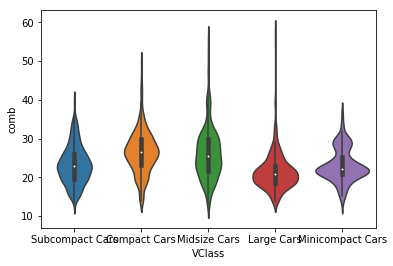

In [22]:
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

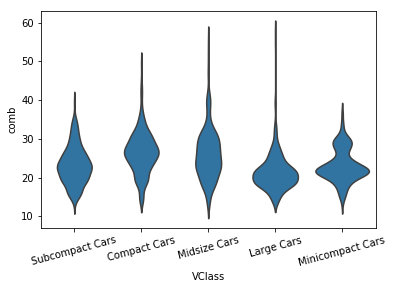

In [24]:
base_color = sns.color_palette()[0]
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = None)
plt.xticks(rotation = 15)

#### Box plots

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

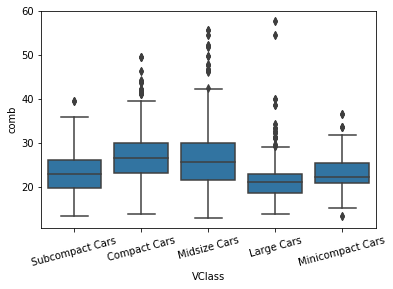

In [26]:
base_color = sns.color_palette()[0]
sns.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

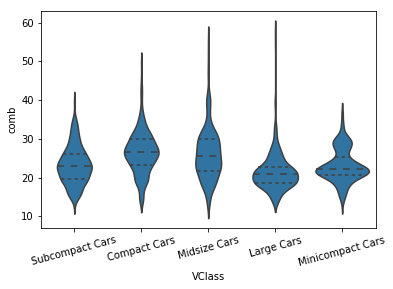

In [27]:
# showing quartile in volinplot
base_color = sns.color_palette()[0]
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile')
plt.xticks(rotation = 15)

(6.966470319355816, 63.09321945242605)

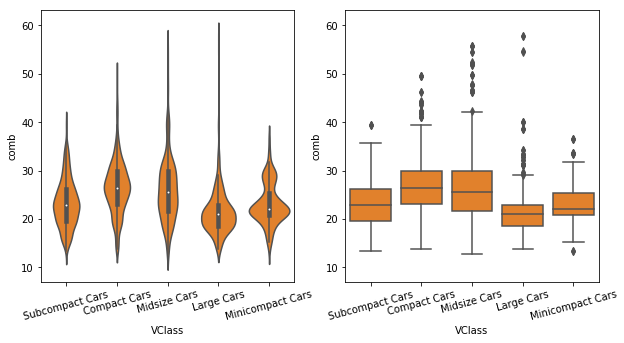

In [31]:
# put them together
plt.figure(figsize = [10,5])
base_color = sns.color_palette()[1]

# left plot: violin plot
plt.subplot(1,2,1)
ax1 = sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color)
plt.xticks(rotation = 15)
# right plot: box plot
plt.subplot(1,2,2)
sns.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color)
plt.xticks(rotation = 15)
plt.ylim(ax1.get_ylim())  # set y-axis limits to be the same as left color

### 5. Clustered Bar Charts
- two qualitative variables

In [33]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

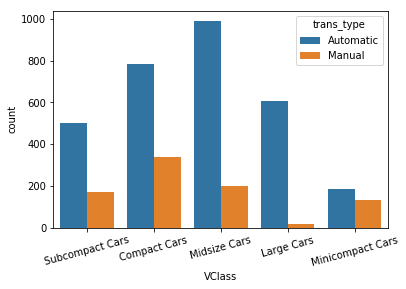

In [35]:
sns.countplot(data = fuel_econ, x='VClass', hue = 'trans_type')
plt.xticks(rotation = 15)

### 6. Faceting
- multiple copies of the same type of plot visualized on different subsets of the data


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

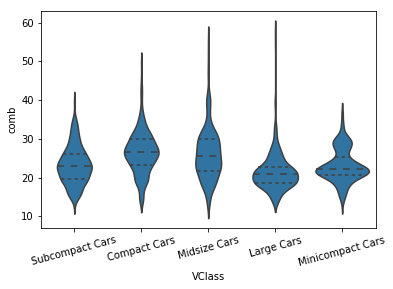

In [36]:
base_color = sns.color_palette()[0]
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile')
plt.xticks(rotation = 15)

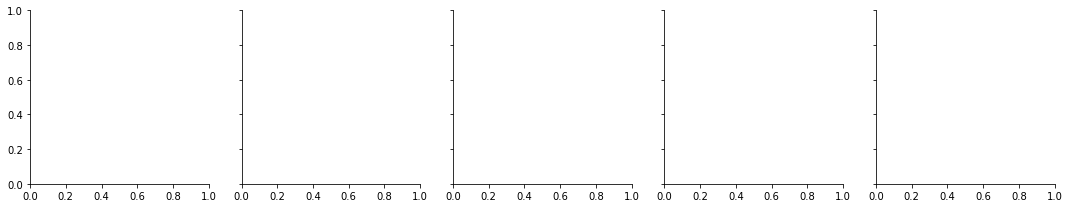

In [38]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass')

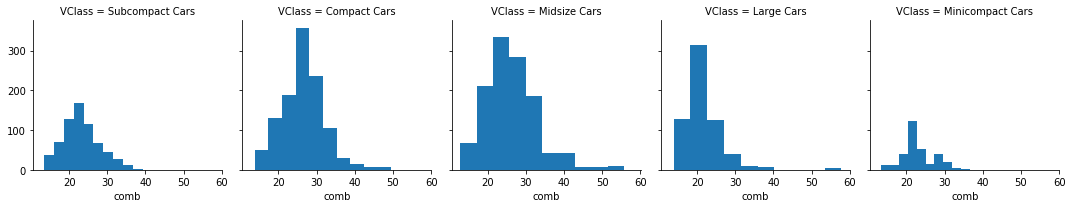

In [40]:

g = sns.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb')

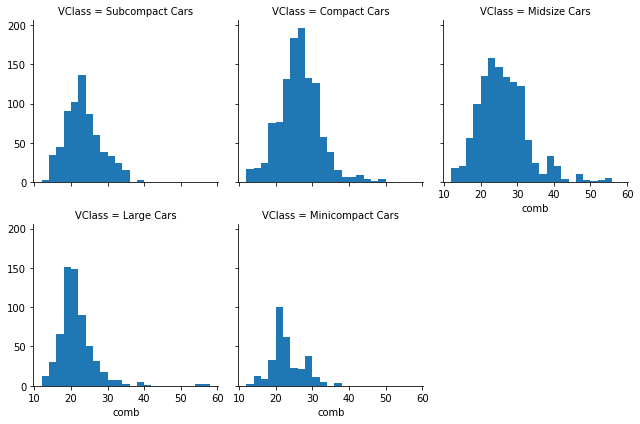

In [41]:
bins = np.arange(12, 58+2, 2)
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3)
g.map(plt.hist, 'comb', bins = bins)


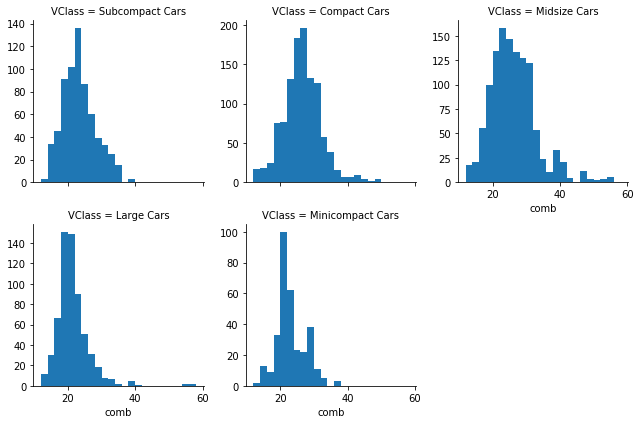

In [43]:
bins = np.arange(12, 58+2, 2)
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey=False)
g.map(plt.hist, 'comb', bins = bins)
# each y has its own limits

### 7. Adaptations of Univariate Plots